In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [79]:
file_name= "4_SB.xlsx"
df= pd.read_excel(file_name)


In [80]:
def train_model(file_name):

    #Concatenate dataframes across columns for features (X)
    X= df[['Precipitation', 'Airtemp']]  # Features

    #Use the entire SWE sheet as the target variable (y)
    y=df['swe'].values.reshape(-1,1)  # Target, reshape to 2D array

    #Handle missing values in X with mean imputation
    imputer_X = SimpleImputer(strategy= 'mean')
    X_imputed = imputer_X.fit_transform(X)

    #Handle missing values in y with mean imputation
    imputer_y = SimpleImputer(strategy='mean')
    y_imputed =  imputer_y.fit_transform(y)

    #Ensure x and y have same number of samples
    min_samples = min(len(X_imputed), len(y_imputed))
    X_imputed = X_imputed[:min_samples]
    y_imputed = y_imputed[:min_samples]

    return X_imputed, y_imputed

In [81]:
X, y = train_model(file_name)

In [82]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
#Train the model
model= LinearRegression()
model.fit(X_train, y_train)

#Predict on test set
y_pred = model.predict(X_test)

In [84]:
#Ensure y_test and y_pred are 1-dimensional arrays
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)


#Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squaerd error for all files: {mse}")


Mean squaerd error for all files: 17.07578413446528


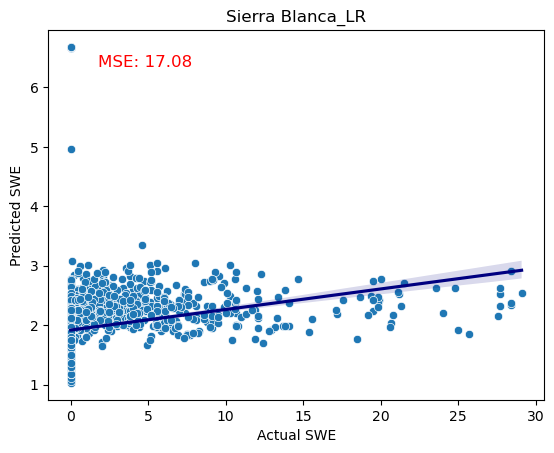

In [85]:
plot_data = pd.DataFrame({'Actual SWE': y_test, 'Predicted SWE': y_pred})
sns.scatterplot(data=plot_data,x='Actual SWE', y='Predicted SWE')

sns.regplot(data=plot_data, x='Actual SWE', y='Predicted SWE', scatter=False, color='navy')
plt.text(0.1, 0.9, f'MSE: {mse:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')
plt.title('Red River Pass_LR')
plt.savefig('RRP_LR.png', dpi=1200)